In [21]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn import cross_validation
from scipy.stats import spearmanr
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")


%matplotlib inline


In [54]:
## How we generate the geometric_all dataframe. 

# def gen_geometric_all():
#     attract = pd.read_csv('../clean_data/geometric_attract.csv')
#     geometric_feature = pd.read_csv('../clean_data/geometric_features.csv')

#     imgName_feature = geometric_feature['imgName']
#     imgName_att = attract['Filename']

#     for i in range(len(imgName_feature)):
#         imgName_feature[i] = imgName_feature[i][34:]    

#     # Create a new line on geometric feature list. 
#     geometric_attract = np.zeros((len(imgName_feature), 1))
#     for idx, file_name in enumerate(imgName_feature):
#         try:
#             match_index = imgName_att.values.tolist().index(file_name)
#             geometric_attract[idx] = attract['attractive'][match_index]
#         except ValueError:
#             print(file_name)

#     new_attract = [item for sublist in geometric_attract for item in sublist]
#     geometric_all = geometric_feature
#     geometric_all['attractive'] = new_attract
#     geometric_all.to_csv('../clean_data/geometric_all.csv')
#     return 


In [3]:
# load x and y 
geometric_all = pd.read_csv('../clean_data/geometric_all.csv')

x = geometric_all.drop(['imgName', 'Unnamed: 0', 'attractive'], axis=1)
x_fields = list(x.columns.values)
feature_x = x.values
feature_x = preprocessing.scale(feature_x)  # normalize the feature matrix. 

attract_y = geometric_all['attractive'].values

In [46]:
# Run linear regression multiple times. 
itr_num = 50
random_seed = np.random.randint(1, 1000, size=itr_num)
test_corr_list = np.zeros((itr_num, 1))
coef_list = np.zeros((len(x_fields), itr_num))
intercept_list = np.zeros((itr_num, 1))
alpha_list = np.zeros((itr_num, 1))
alphas = np.logspace(-3, 2, num=20)
# alphas = [0.0000001, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,30]

for cur_itr in range(itr_num):
    print cur_itr
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(feature_x, attract_y, test_size=0.5, random_state=random_seed[cur_itr])
    clf = linear_model.RidgeCV(alphas=alphas, fit_intercept=True)
#     clf = linear_model.LassoCV()
    clf.fit(x_train, y_train)
    
    coef_list[:, cur_itr] = clf.coef_
    intercept_list[cur_itr] = clf.intercept_
    alpha_list[cur_itr] = clf.alpha_
    
    y_test_pred = clf.predict(x_test)
    corr = spearmanr(y_test, y_test_pred)
    test_corr_list[cur_itr] = corr[0]

test_corr_list.mean()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


0.53036925904008492

In [47]:
alpha_list

array([[  2.6366509 ],
       [  2.6366509 ],
       [  4.83293024],
       [  1.43844989],
       [  4.83293024],
       [  4.83293024],
       [  4.83293024],
       [  4.83293024],
       [  4.83293024],
       [  8.8586679 ],
       [  8.8586679 ],
       [ 16.23776739],
       [  4.83293024],
       [  8.8586679 ],
       [  2.6366509 ],
       [  0.23357215],
       [  4.83293024],
       [  2.6366509 ],
       [  1.43844989],
       [  1.43844989],
       [  4.83293024],
       [  2.6366509 ],
       [  8.8586679 ],
       [  4.83293024],
       [  8.8586679 ],
       [ 16.23776739],
       [  0.23357215],
       [  1.43844989],
       [  4.83293024],
       [  4.83293024],
       [  4.83293024],
       [  4.83293024],
       [  4.83293024],
       [  8.8586679 ],
       [  4.83293024],
       [  8.8586679 ],
       [  1.43844989],
       [  4.83293024],
       [  8.8586679 ],
       [  2.6366509 ],
       [  0.06951928],
       [  8.8586679 ],
       [  2.6366509 ],
       [  8

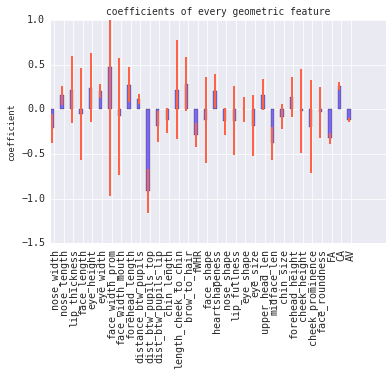

In [48]:
# Now plot the social features with error bar. 
coef_mean = coef_list.mean(axis=1)
coef_std = coef_list.std(axis=1)

# plot
n = len(coef_mean)  # number of data entries
ind = np.arange(n)  # the x locations for the groups
width = 0.35 # bar width

fig, ax = plt.subplots()

rects1 = ax.bar(ind, coef_mean,                  # data
                width,                          # bar width
                color='MediumSlateBlue',        # bar colour
                yerr=coef_std,                  # data for error bars
                error_kw={'ecolor':'Tomato',    # error-bars colour
                          'linewidth':2})       # error-bar width

axes = plt.gca()
axes.set_ylim([-1.5, 1])


ax.set_ylabel('coefficient')
ax.set_title('coefficients of every geometric feature')

ax.set_xticks(ind + width)
ax.set_xticklabels(x_fields, rotation=90)
plt.tick_params(labelsize=10)
plt.savefig('../figs/geometric_feature_bargraph.png')
plt.show()

In [50]:
x_fields[23]

'midface_len'

In [18]:
# Now plot the correlation heatmap. 
relevant_feature = geometric_all.drop(['imgName', 'Unnamed: 0'], axis=1)
corrmat = relevant_feature.corr() 

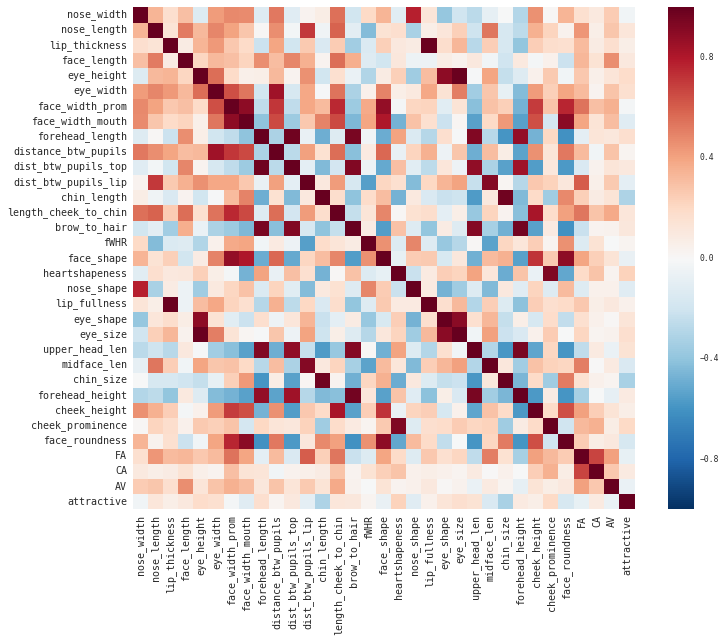

In [23]:
# Plot the heat map.
f, ax = plt.subplots(figsize=(12, 9))

# reorganize the order based on their correlation with attractiveness. 



# Draw the heatmap using seaborn
sns.heatmap(corrmat, square=True, vmin=-1, vmax=1)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(labelsize=10)
plt.savefig('../figs/geometric_feature_correlation_heatmap.png')
plt.show()

In [30]:
corrmat.sort_index(by='attractive', ascending=0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,nose_width,nose_length,lip_thickness,face_length,eye_height,eye_width,face_width_prom,face_width_mouth,forehead_length,distance_btw_pupils,...,midface_len,chin_size,forehead_height,cheek_height,cheek_prominence,face_roundness,FA,CA,AV,attractive
attractive,-0.038630,0.119506,0.064241,0.106840,0.182054,0.161992,-0.019065,-0.121979,0.165858,0.027480,...,-0.155598,-0.325566,0.091844,0.067798,0.196507,-0.170891,-0.079128,0.087933,-0.068014,1.000000
heartshapeness,-0.110585,0.170731,0.103822,0.112497,0.235685,0.065572,-0.023387,-0.472269,0.399229,-0.075871,...,0.123168,-0.492445,0.283977,-0.065734,0.934395,-0.521335,0.192292,0.287532,0.033306,0.229845
cheek_prominence,0.012222,0.218882,0.178280,0.046938,0.259774,0.237949,0.284724,-0.174624,0.210791,0.129705,...,0.227863,-0.355242,0.083767,0.190645,1.000000,-0.195330,0.321786,0.356569,0.071127,0.196507
eye_height,-0.140535,0.324716,0.338934,0.212917,1.000000,0.561144,0.187684,0.058286,0.065450,0.327940,...,0.397263,-0.239872,-0.130937,0.047767,0.259774,-0.035559,0.273287,0.055467,0.129160,0.182054
eye_size,-0.197862,0.240500,0.331407,0.040478,0.984538,0.513891,0.134543,0.016816,-0.013908,0.278379,...,0.411838,-0.211905,-0.149341,0.050890,0.257546,-0.001773,0.217618,0.029136,0.042896,0.167965
forehead_length,-0.125333,0.009325,-0.217484,0.463241,0.065450,-0.187919,-0.256055,-0.403409,1.000000,-0.319095,...,-0.274208,-0.591223,0.879252,-0.473806,0.210791,-0.604863,-0.101555,0.131035,0.112622,0.165858
eye_width,0.423110,0.491786,0.434693,0.326811,0.561144,1.000000,0.644112,0.538199,-0.187919,0.844588,...,0.276603,-0.081911,-0.432360,0.425424,0.237949,0.396467,0.317974,0.038497,0.288435,0.161992
upper_head_len,-0.266389,-0.204352,-0.278865,0.103802,-0.015257,-0.348309,-0.415176,-0.545286,0.929264,-0.488742,...,-0.293621,-0.580361,0.946926,-0.524008,0.216579,-0.589638,-0.254648,0.085977,-0.066914,0.142147
eye_shape,-0.389659,0.123912,0.178470,0.073695,0.896476,0.144342,-0.114861,-0.212974,0.169121,-0.052233,...,0.328314,-0.238048,0.066131,-0.165496,0.184980,-0.246809,0.162401,0.054331,0.008453,0.130338
nose_length,0.341851,1.000000,0.140151,0.518225,0.324716,0.491786,0.399718,0.275066,0.009325,0.462216,...,0.538777,-0.165766,-0.262693,0.356637,0.218882,0.045707,0.438842,0.064680,0.274107,0.119506
